# AA/AB Testing Seminar. MMDS 2023

Author: Kirill Bykov + ChatGPT (thanks for text)

## Importance in Decision-Making Processes

A/B testing plays a crucial role in decision-making processes across various industries. It allows organizations to make data-driven decisions, optimize strategies, and achieve better outcomes. Let's explore the significance of A/B testing in decision-making.

### Case Study: A/B Testing in Action

Let's explore a hypothetical case study where an e-commerce company wants to optimize its product page for increased conversions.

#### Scenario:

- **Hypothesis:** Changing the color of the "Buy Now" button from green to orange will increase the click-through rate.
- **Implementation:** Conduct an A/B test where half the users see the green button (Group A) and the other half sees the orange button (Group B).
- **Measurement:** Track the click-through rates for both groups over a specified period.

#### Results:

- Group A (Green Button): 5% click-through rate
- Group B (Orange Button): 8% click-through rate

#### Conclusion:

The A/B test results indicate a statistically significant improvement in the click-through rate for the orange button. The company decides to implement the change on the entire website, leading to a positive impact on overall conversions.

## Definition and Purpose of A/B Testing

A/B testing, also known as split testing, is a statistical method used to compare two versions of a variable, typically by testing a subject's response to variant A against variant B. The primary purpose of A/B testing is to make data-driven decisions and optimize processes for better outcomes.

### Understanding A/B Testing Basics

A/B testing involves comparing two versions (A and B) of a webpage, email campaign, or other marketing strategies to determine which one performs better. The process typically includes:

1. **Randomization:** Users are randomly assigned to either group A or B to ensure a fair comparison.

2. **Treatment:** Each group is exposed to a different variant (A or B) of the variable being tested.

3. **Measurement:** Key performance indicators (KPIs) are measured for each group to evaluate the effectiveness of the variants.

4. **Statistical Analysis:** Statistical methods are used to determine if any observed differences in performance are statistically significant.

Now, let's explore a simple example of A/B testing using Python and some sample data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.stats.power as smp
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
# Generate example data, let's say clicks
np.random.seed(42)
group_a = np.random.normal(loc=25, scale=5, size=1000)
group_b = np.random.normal(loc=26, scale=5, size=1000)

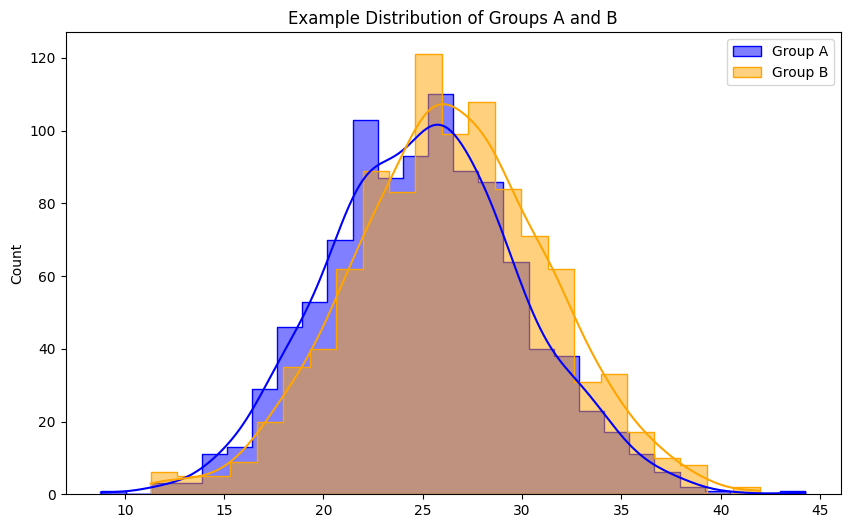

In [3]:
# Visualize the distributions
plt.figure(figsize=(10, 6))
sns.histplot(group_a, color='blue', label='Group A', kde=True, element="step")
sns.histplot(group_b, color='orange', label='Group B', kde=True, element="step")
plt.title('Example Distribution of Groups A and B')
plt.legend()
plt.show()

In [4]:
# Perform a t-test
t_stat, p_value = ttest_ind(group_a, group_b)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

T-test results: t-statistic = -5.689937309043167, p-value = 1.4584627135935596e-08


In [5]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Diff is significant')
else:
    print('Diff is not significant')

Diff is significant


In [6]:
group_a.mean(), group_b.mean()

(25.096660279111628, 26.35418118624578)

Since group_b has higher mean and we know that difference is significant, it means we've been able to increase average number of clicks

## Key Concepts

### Hypothesis Formulation

#### Formulating Clear Hypotheses

In A/B testing, hypotheses are statements that articulate the expected impact of changes on a specific metric. A well-formulated hypothesis typically follows the structure: "Changing `variable` from `A` to `B` will result in `expected outcome`."

Example:
- Hypothesis: Changing the color of the "Buy Now" button from blue to green will increase the conversion rate by 10%.

#### Linking Hypotheses to Business Goals

It's crucial to align hypotheses with overarching business goals. A/B testing should contribute to achieving specific objectives, such as increasing revenue, improving user engagement, or optimizing conversion rates.

Example:
- Business Goal: Increase overall conversion rates on the website.
- Hypothesis: Changing the layout of the homepage will result in a 15% increase in user sign-ups.


### Randomization and Control Groups
#### Importance of Randomization

Incorrect Randomization Example
Suppose an e-commerce website wants to test two different versions of its homepage to see which one leads to higher conversion rates. Without proper randomization, they decide to assign users based on their signup timestamps. The first 50 users are assigned to Version A, and the next 50 users are assigned to Version B.

Issues with Incorrect Randomization:

- Users who signed up earlier might have different behavior patterns than those who signed up later.
- Seasonal trends or external events could influence the signup order, introducing confounding variables.
- The groups may not be representative of the overall user population.

In [7]:
np.random.seed(42)
values = np.random.normal(loc=100, scale=20, size=100000)

# Incorrect randomization
group_a_indices = np.sort(values)[:50]
group_b_indices = np.sort(values)[50:]

# Creating data for analysis
data_a = pd.DataFrame({'conversion_rate': group_a_indices, 'group': 'A'})
data_b = pd.DataFrame({'conversion_rate': group_b_indices, 'group': 'B'})
data = pd.concat([data_a, data_b])

# Performing t-test
t_stat, p_value = ttest_ind(data[data['group'] == 'A']['conversion_rate'],
                            data[data['group'] == 'B']['conversion_rate'])
print(f'T-test results (incorrect randomization): t-statistic = {t_stat}, p-value = {p_value}')


T-test results (incorrect randomization): t-statistic = -25.219640220577567, p-value = 6.699695484484928e-140


We see that even though users are taken from the same distribution, sorting changed their means so much that t-test is sure those are different distributions

In [8]:
np.random.seed(42)

# Correct randomization. Randomly assigning users to Group A or Group B
data['random_assignment'] = np.random.choice(['A', 'B'], size=len(data))

# Performing t-test
t_stat_correct, p_value_correct = ttest_ind(data[data['random_assignment'] == 'A']['conversion_rate'],
                                            data[data['random_assignment'] == 'B']['conversion_rate'])
print(f'T-test results (correct randomization): t-statistic = {t_stat_correct}, p-value = {p_value_correct}')


T-test results (correct randomization): t-statistic = -0.4854387988243778, p-value = 0.6273661794834944


After we took the same dataset and randomized it, t-test noticed that the distribution of users is the same

## Planning Your A/B Test. Choosing the Right Elements to Test


### Experimental Design
#### Randomization Techniques
##### Simple randomization
We've already seen this one in the previous example, this goes simply by randomizing of the whole available data set without any specific criteria.




In [9]:
np.random.seed(42)
values = np.arange(1, 101)
np.random.shuffle(values)

# Assign participants to Group A and Group B
group_a = values[:50]
group_b = values[50:]

# Create a DataFrame for analysis
data = pd.DataFrame({'V': values,
                     'Group': np.where(values <= 50, 'A', 'B')})

# Performing t-test
t_stat_correct, p_value_correct = ttest_ind(data[data['Group'] == 'A']['V'],
                                            data[data['Group'] == 'B']['V'])
print(f'T-test results (correct randomization): t-statistic = {t_stat_correct}, p-value = {p_value_correct}')

T-test results (correct randomization): t-statistic = -17.149858514250884, p-value = 2.876775827484201e-31


##### Stratified randomization

In [10]:
# Generate example data with strata
strata = np.random.choice(['Male', 'Female'], size=100, p=[0.55, 0.45])

skf = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
A_idx, B_idx = next(iter(skf.split(values, strata)))

# Performing t-test
t_stat_correct, p_value_correct = ttest_ind(values[A_idx],
                                            values[B_idx])
print(f'T-test results (correct randomization): t-statistic = {t_stat_correct}, p-value = {p_value_correct}')

T-test results (correct randomization): t-statistic = -0.17149858514250882, p-value = 0.8641853688227963


## Selecting appropriate group size

Factors to consider

### 1. Effect Size

The effect size represents the magnitude of the difference or relationship being investigated. It is used by a researcher to determine the expected effect in an experiment and to calculate the optimal sample size. A larger effect size often requires a smaller sample size to achieve statistical significance.

Researchers should consider the expected effect size based on previous studies, pilot data or domain knowledge.

It is pretty common to define it as a standartized distance between means, which is Cohen's d measure

$$\text{effect size}=\frac{\bar{x_1}-\bar{x_2}}{\sigma}$$

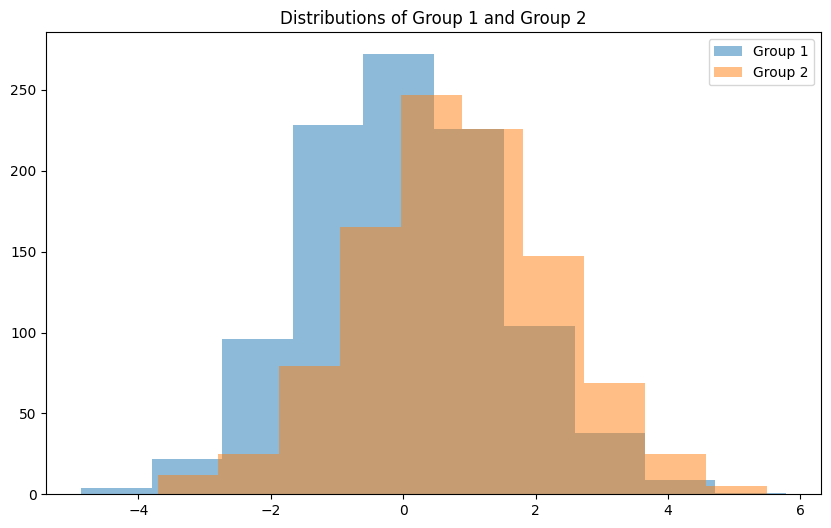

Cohen's d: 0.5294339152173355


In [11]:
def cohen_d(group1, group2):
  return np.abs((group1.mean() - group2.mean()) / group1.std())

np.random.seed(42)
group1 = np.random.normal(loc=0, scale=1.5, size=1000)
group2 = np.random.normal(loc=0.7, scale=1.5, size=1000)

# Calculate Cohen's d
effect_size = cohen_d(group1, group2)

# Plot the distributions
plt.figure(figsize=(10, 6))

plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.title('Distributions of Group 1 and Group 2')
plt.legend()
plt.show()

print(f"Cohen's d: {effect_size}")


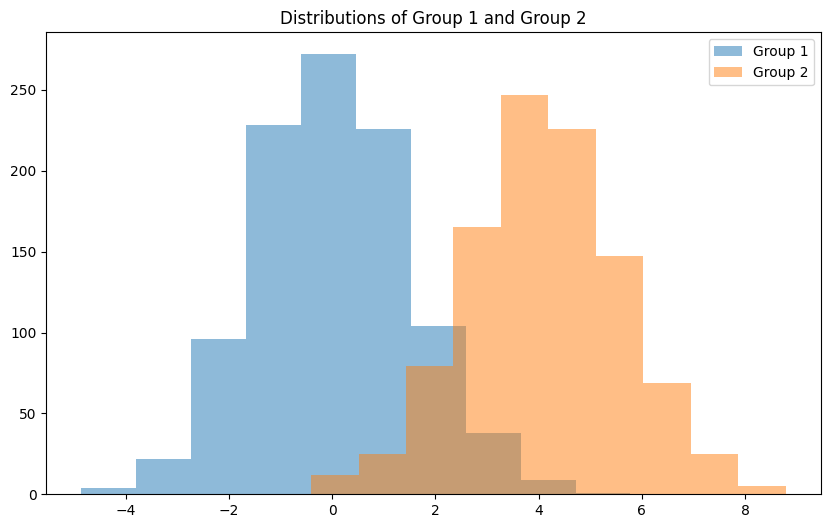

Cohen's d: 2.777253563434932


In [12]:
np.random.seed(42)
group1 = np.random.normal(loc=0, scale=1.5, size=1000)
group2 = np.random.normal(loc=4, scale=1.5, size=1000)

# Calculate Cohen's d
effect_size = cohen_d(group1, group2)

# Plot the distributions
plt.figure(figsize=(10, 6))

plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.title('Distributions of Group 1 and Group 2')
plt.legend()
plt.show()

print(f"Cohen's d: {effect_size}")

### 2. Statistical Power

Statistical power is the probability of detecting a true effect if it exists. A higher statistical power is desirable and typically requires a larger sample size. Researchers should decide on an acceptable level of power (e.g., 0.80) based on the study's goals and conventions in the field.

Having fixed sample size it is possible to see the more effect size is expected the better statistical power will be

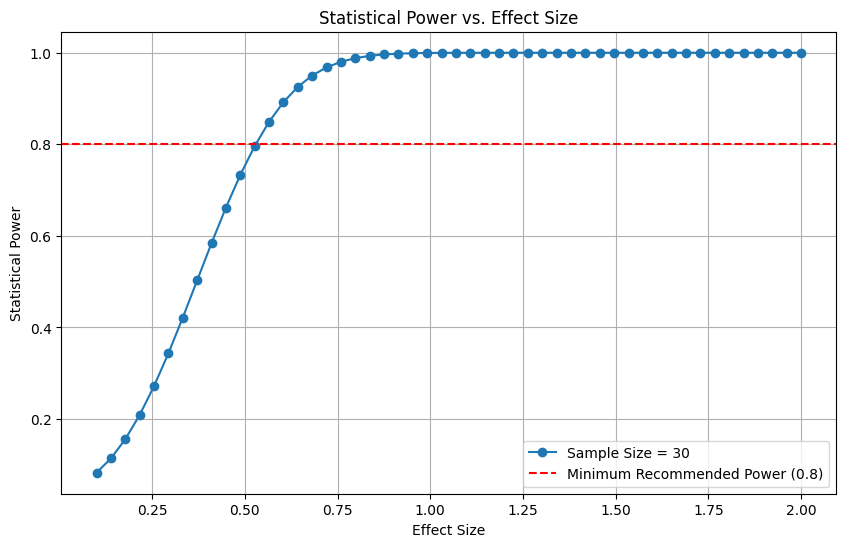

In [13]:
alpha = 0.05
sample_size = 30

# Create an array of effect sizes
effect_sizes = np.linspace(0.1, 2.0, 50)

# Calculate power for each effect size
power_values = [smp.ttest_power(effect_size, nobs=sample_size, alpha=alpha, alternative='two-sided') for effect_size in effect_sizes]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, power_values, label=f'Sample Size = {sample_size}', marker='o')
plt.title('Statistical Power vs. Effect Size')
plt.xlabel('Effect Size')
plt.ylabel('Statistical Power')
plt.axhline(0.8, color='r', linestyle='--', label='Minimum Recommended Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()


Now let's say we wish to have very sensitive test (which means that it is able to detect even small effect sizes) and observe what sample size we may need to get appropriate test power

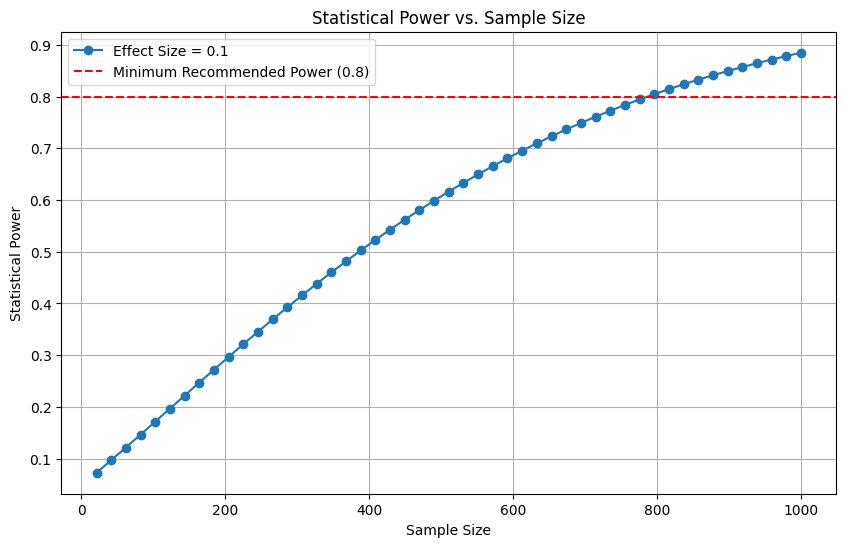

In [14]:
alpha = 0.05
effect_size = 0.1  # detecting small differences in mean

# Create an array of sample sizes
sample_sizes = np.linspace(1, 1000, 50)

# Calculate power for each effect size
power_values = [smp.ttest_power(effect_size, nobs=sample_size, alpha=alpha, alternative='two-sided') for sample_size in sample_sizes]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, power_values, label=f'Effect Size = {effect_size}', marker='o')
plt.title('Statistical Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Statistical Power')
plt.axhline(0.8, color='r', linestyle='--', label='Minimum Recommended Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()


As we may see if we wish to detect small changes we need to have lots of points available in order to get appropriate statistical power.

And vice versa if we expect our means to differ significantly, the difference will be possible to detect even using small samples

### 3. Significance Level

The significance level (alpha) is the probability of rejecting a null hypothesis that is actually true. Commonly set at 0.05, researchers should decide on the appropriate alpha level and consider its impact on sample size calculations.

Practically it means that if we make 100 totally random experiments, ~5 of them would be detected to be statistically significant. We perform 50 of such tests and calculate the expected mean which would be our expected p-value

In [15]:
np.random.seed(42)
alpha=0.05

significants = []

for i in range(50):

  is_significant_counter = 0
  for j in range(100):
    A = np.random.normal(loc=0, scale=1.5, size=1000)
    B = np.random.normal(loc=0, scale=1.5, size=1000)

    _, p_value = ttest_ind(A, B)

    if p_value < 0.05:
      is_significant_counter += 1

  significants.append(is_significant_counter / 100)

print(f'Expected p_values: {np.mean(significants)}, std: {np.std(significants)}')


Expected p_values: 0.048600000000000004, std: 0.019079832284378186


We see that indeed 5% of our t-tests actually have false positive alarms

### 4. Variability

The variability of the data, often measured by the standard deviation, influences the sample size. Higher variability generally requires a larger sample size to achieve the same level of precision. You may see that the higher variable your data is the lower is effect size. Researchers should estimate variability based on available data.

### 5. Power Analysis

We have desired effect size, significance level and statistical power for our experiment. We also saw that these all affect the sample size needed to reach these values. Now we are ready to estimate the sample size. The process is called Power analysis. It involves using statistical methods to determine the required sample size. Below is an example of performing a power analysis using Python and the `statsmodels` library:


In [16]:
effect_size = 0.1  # desired effect size
alpha = 0.05       # significance level
power = 0.8        # desired power

# Perform power analysis
analysis = smp.TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=alpha)

print(f"Required Sample Size: {sample_size:.2f}")

Required Sample Size: 1570.73


### AA test

The purpose of the A/A group is to serve as a baseline for comparison with the A/B groups. If there are issues with the A/A group (e.g., unexpected statistical significance since data is taken from the same distribution and no treatment was done), it may indicate problems with the experimental setup or data collection, and the results of the A/B test should not be used.

$$\mathbb{E}A_1 = \mathbb{E}A_2$$
and if it doesn't hold - something is wrong